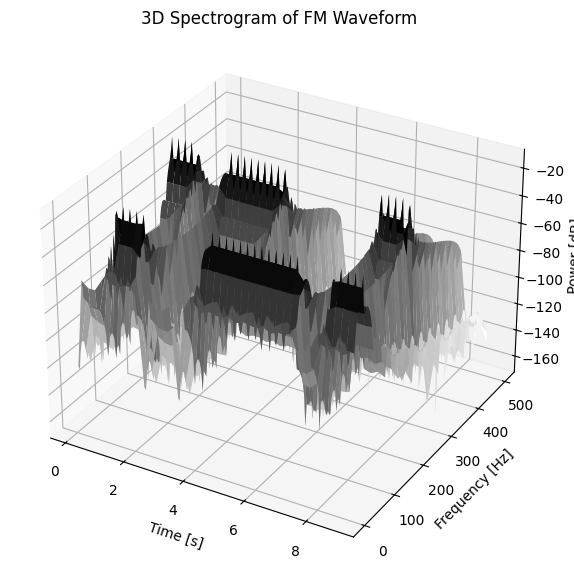

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import spectrogram
from dft_waveform import generate_fm_waveform

def generate_fsk_waveform(data, fs=1000, f0=50, f1=300, bit_duration=1):
    t = np.arange(0, bit_duration * len(data), 1/fs)
    waveform = np.zeros_like(t)
    for i, bit in enumerate(data):
        freq = f1 if bit else f0
        idx_start = int(i * bit_duration * fs)
        idx_end = int((i + 1) * bit_duration * fs)
        waveform[idx_start:idx_end] = np.cos(2 * np.pi * freq * t[idx_start:idx_end])
    return t, waveform

data = [1, 0, 1, 1, 0, 0, 0, 1, 0]  # Example data sequence
# Generate FM waveform
# t, waveform = generate_fm_waveform(duration=1.0, fs=1000, f_carrier=5, f_mod=2, mod_index=2)
t, waveform = generate_fsk_waveform(data)

# Compute spectrogram
fs = 1000  # Sampling frequency
f, tt, Sxx = spectrogram(waveform, fs)

# Prepare meshgrid for 3D plotting
T, F = np.meshgrid(tt, f)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Use log scale for better visualization
ax.plot_surface(T, F, 10 * np.log10(Sxx), cmap='binary')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Frequency [Hz]')
ax.set_zlabel('Power [dB]')
ax.set_title('3D Spectrogram of FM Waveform')

plt.show()